In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import rescomp
import rescomp.esn_new_update_code as esn_new

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


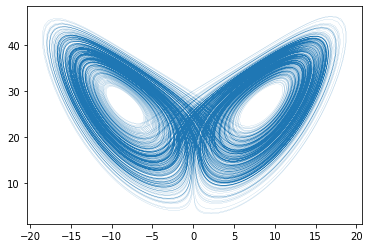

In [2]:
# Lorenz parameters:
dt_L = 0.01
lyap_L = 0.934
starting_point_L = np.array([0, 1, 0])
# starting_point_L = np.array([-14.03020521, -20.88693127, 25.53545])

# lorenz iterator:
def data_creation_function_L(time_steps, dt, starting_point):
    return rescomp.simulations.simulate_trajectory("lorenz", dt, time_steps, starting_point)

def f_L(x):
    return data_creation_function_L(2, dt_L, x)[-1]

# test lorenz iterator:
disc_steps = 1000
time_steps = 50000

time_series_all = np.zeros((time_steps+disc_steps, 3))
time_series_all[0, :] = starting_point_L

for i in range(1, time_steps+disc_steps):
    x_last = time_series_all[i - 1, :]
    time_series_all[i, :] = f_L(x_last)

time_series_L = time_series_all[disc_steps:, :]

plt.plot(time_series_L[:, 0], time_series_L[:, 2], linewidth=0.1)

In [25]:
time_series = time_series_L[:10000]
time_series.shape

(10000, 3)

In [26]:
esn = esn_new._ESNCore()

In [27]:
esn.temp_init_ESN()

In [28]:
input = time_series_L
esn._drive_res(time_series, save_out=True, save_r=True, save_r_gen=True)

In [31]:
esn._saved_out[0]

array([5.17021859, 5.89694837, 4.40352553])

In [32]:
input[0]

array([-5.91656551, -5.52331221, 24.5724456 ])

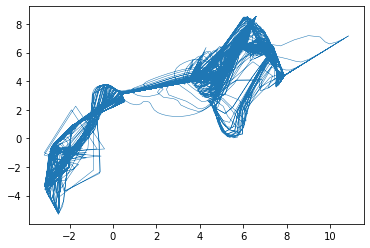

In [30]:
to_plot = esn._saved_out
plt.plot(to_plot[:, 0], to_plot[:, 2], linewidth=0.51)
